In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("song_data.csv")

In [4]:
data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [6]:
data.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [7]:
data=data.drop(columns=['song_name'])

In [8]:
data=data.rename(columns={'song_duration_ms': 'duration'})

In [9]:
data=data.rename(columns={'song_popularity': 'popularity'})

In [10]:
data=data.drop_duplicates()

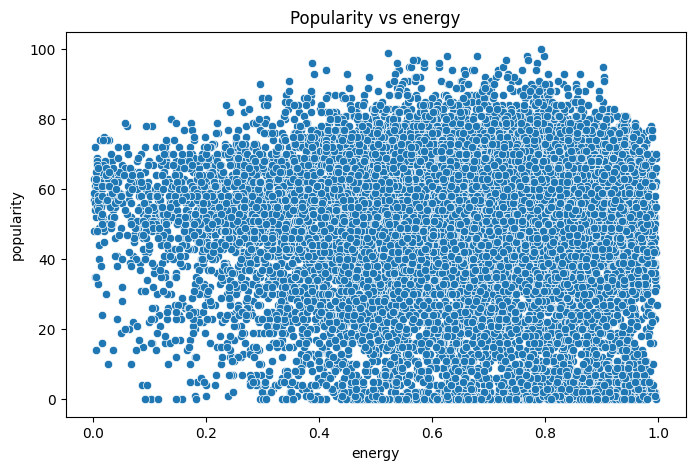

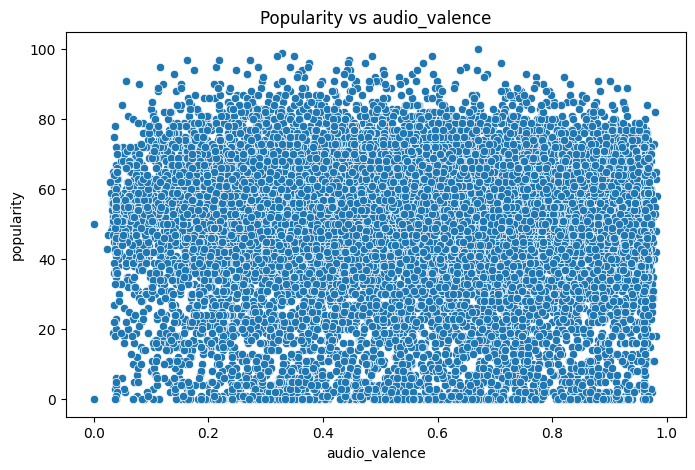

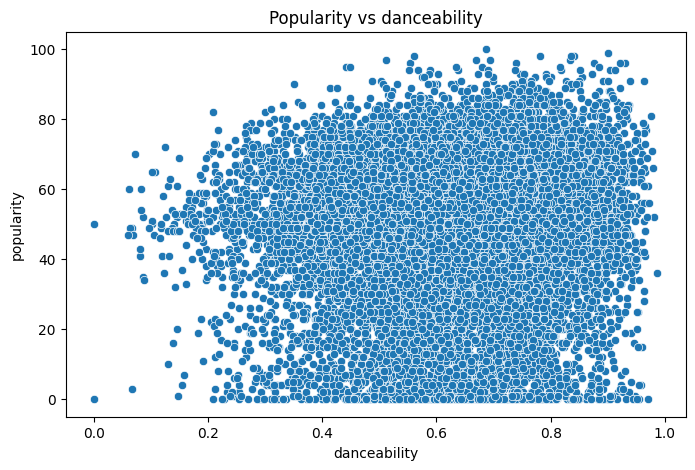

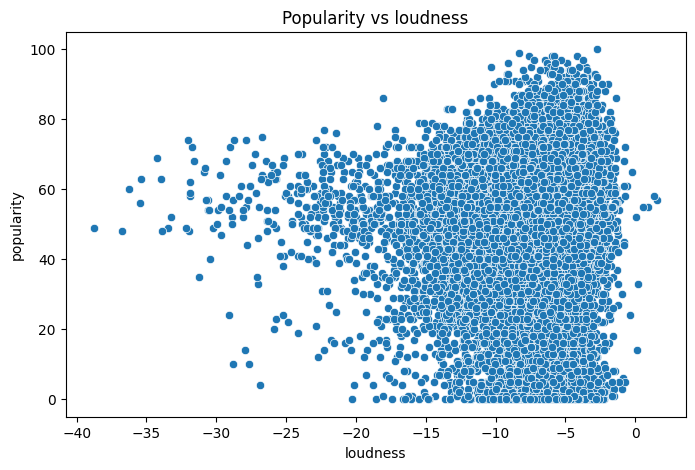

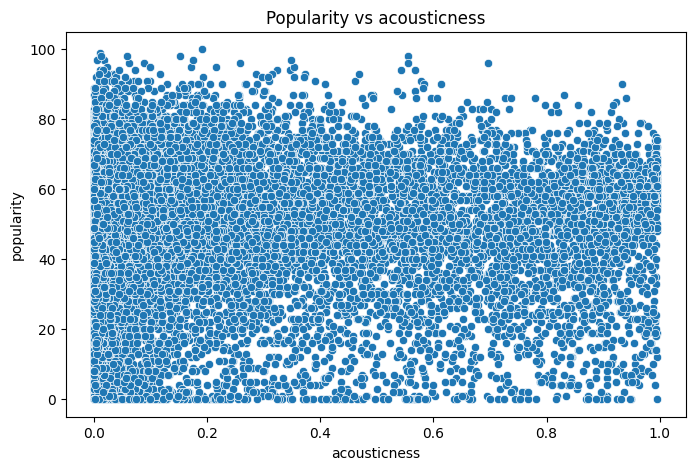

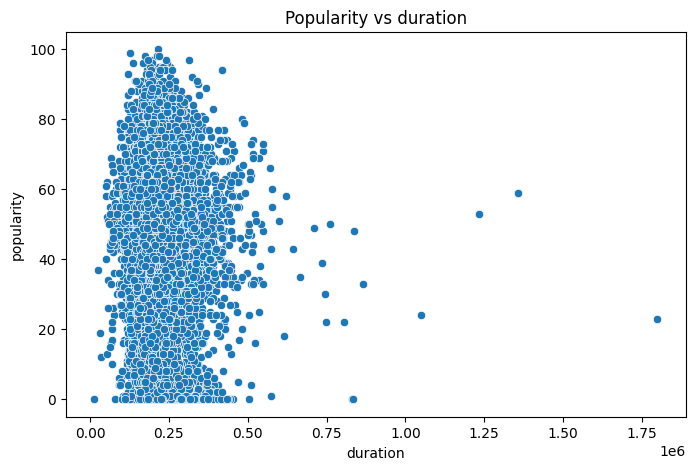

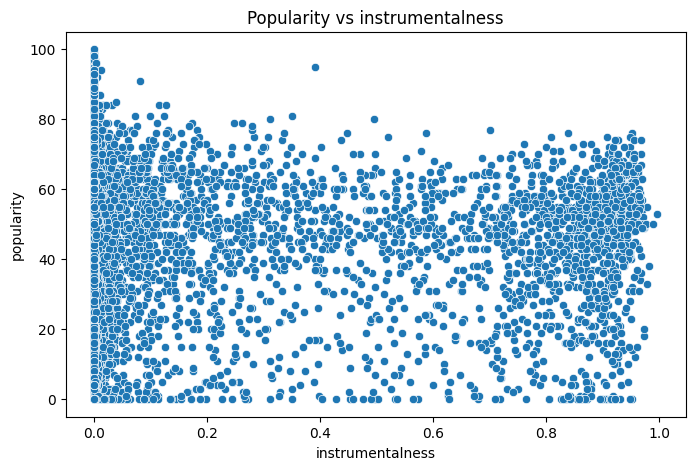

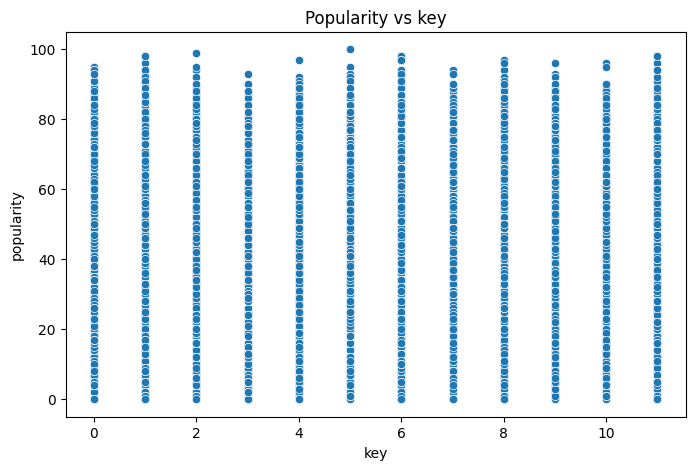

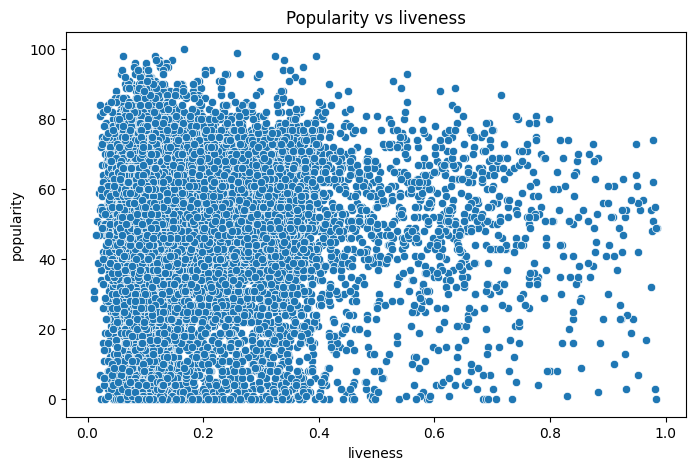

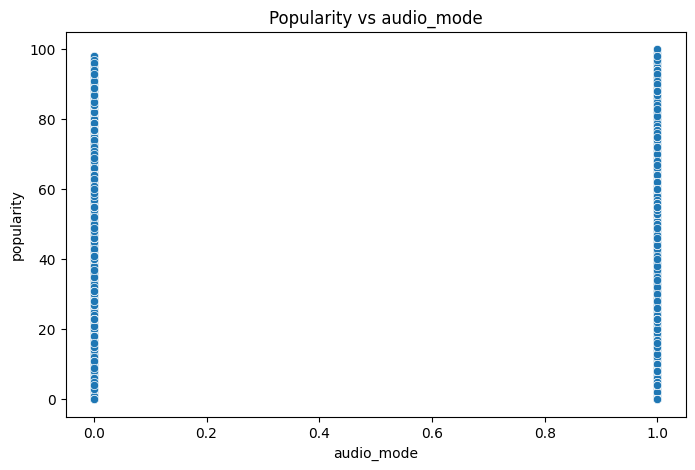

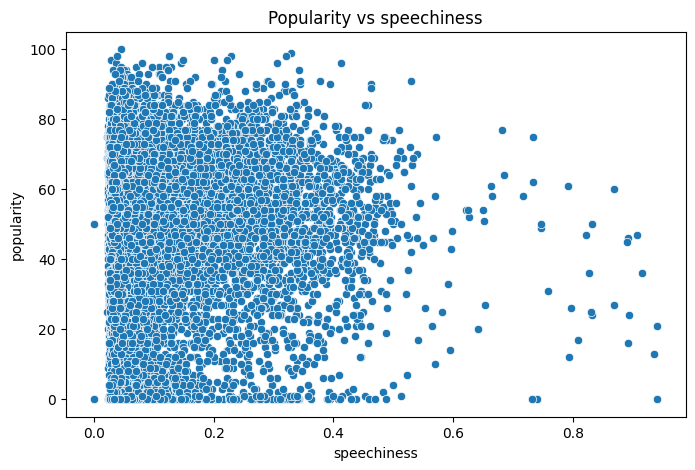

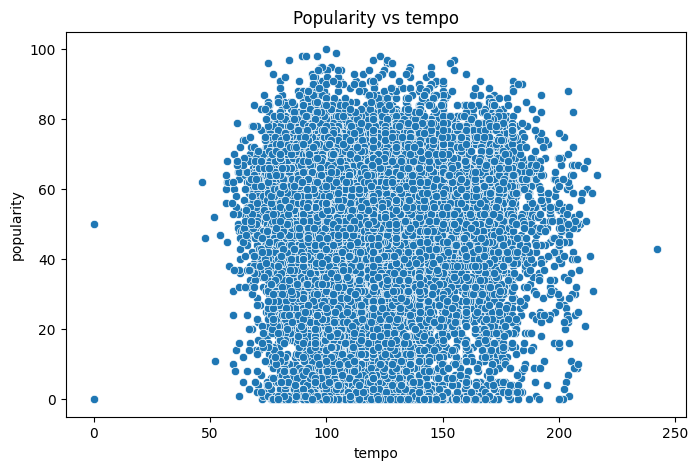

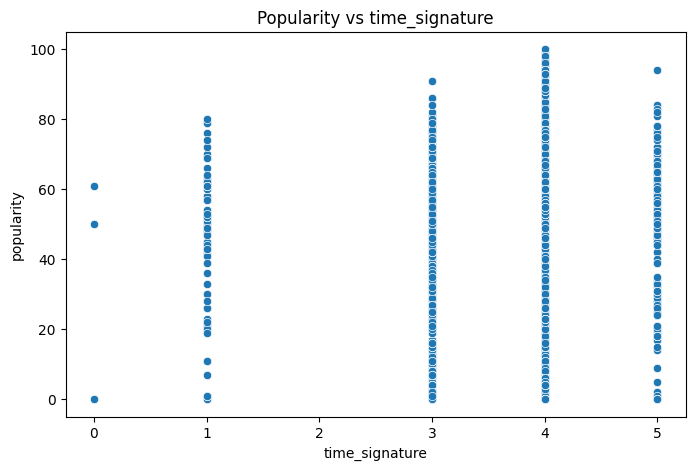

In [11]:
features = ['energy', 'audio_valence', 'danceability', 'loudness', 'acousticness','duration','instrumentalness','key','liveness','audio_mode','speechiness','tempo','time_signature']
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, x=feature, y='popularity')
    plt.title(f'Popularity vs {feature}')
    plt.show()

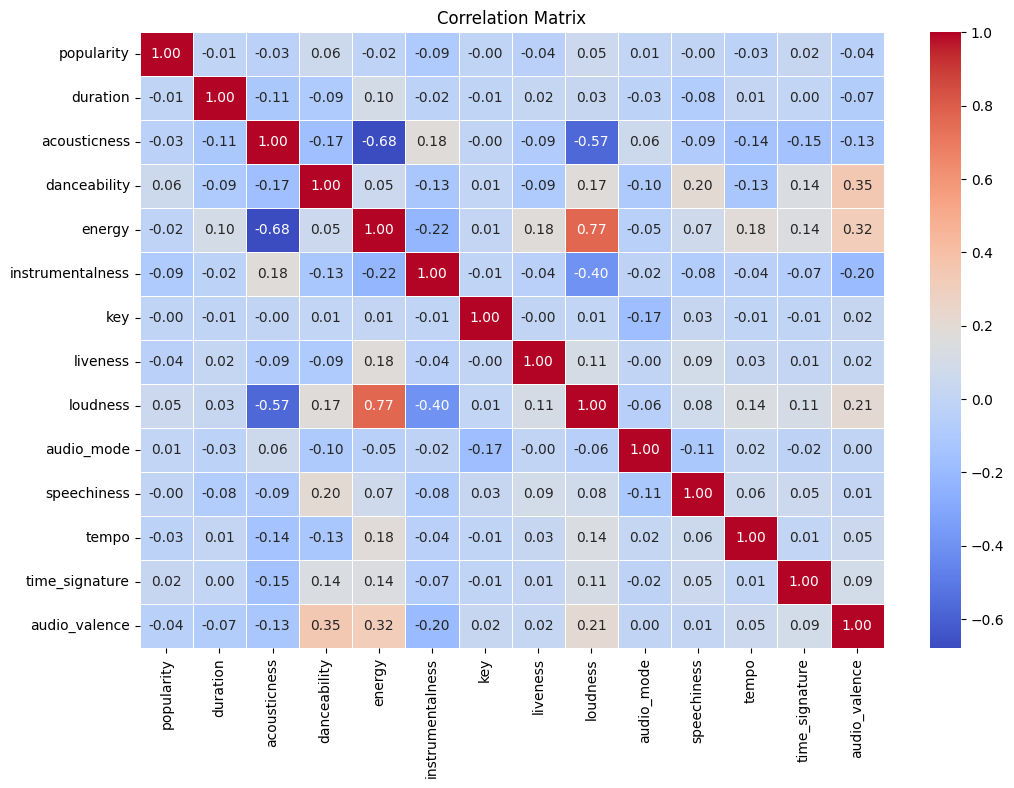

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
correlations = data.corr()['popularity'].sort_values(ascending=False)
print(correlations)

popularity          1.000000
danceability        0.056569
loudness            0.052036
time_signature      0.023298
audio_mode          0.008764
speechiness        -0.002000
key                -0.003796
duration           -0.007773
energy             -0.016543
tempo              -0.029500
acousticness       -0.031599
liveness           -0.038503
audio_valence      -0.044001
instrumentalness   -0.093012
Name: popularity, dtype: float64


In [14]:
#features showing relation with popularity
#loudness,instrumentalness,dancebility,valenve,liveliness,acousticness,tempo,time_signature

In [21]:
newdata=data[['popularity','loudness','instrumentalness','danceability','audio_valence','liveness','acousticness','tempo',]]

In [22]:
newdata.head()

,popularity,loudness,instrumentalness,danceability,audio_valence,liveness,acousticness,tempo
0,73,-4.095,0.000029,0.496,0.474,0.0589,0.005520,167.060
1,66,-6.407,0.000000,0.542,0.370,0.1080,0.010300,105.256
2,76,-7.828,0.447000,0.737,0.324,0.2550,0.008170,123.881
3,74,-4.938,0.003550,0.451,0.198,0.1020,0.026400,122.444
4,56,-5.065,0.000000,0.447,0.574,0.1130,0.000954,172.011


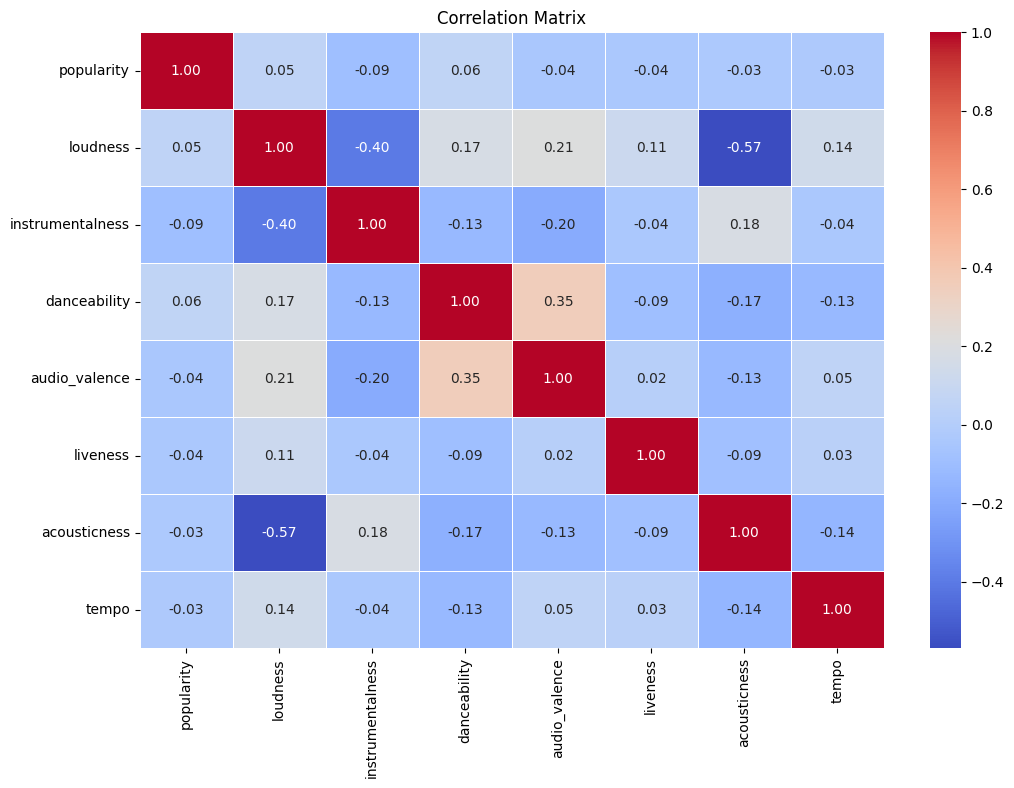

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(newdata.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [24]:
newdata.to_csv('cleaned_data.csv', index=False)  

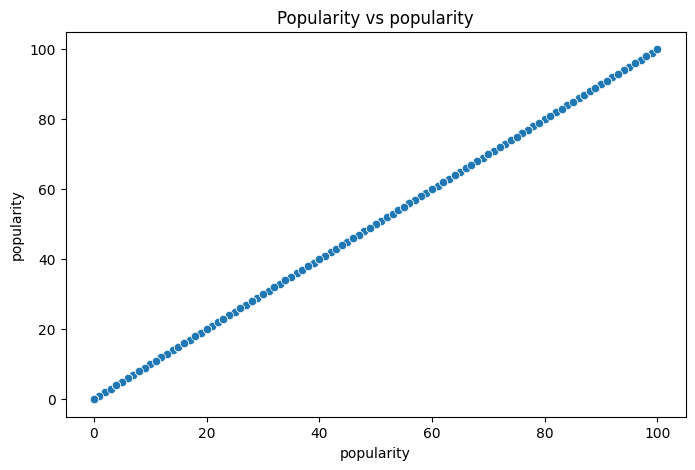

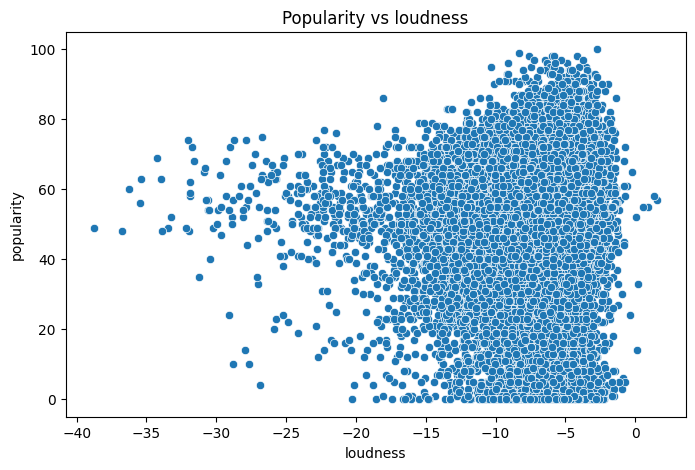

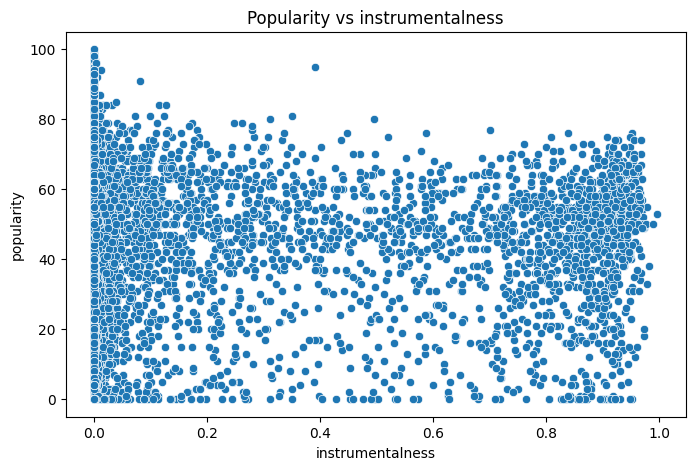

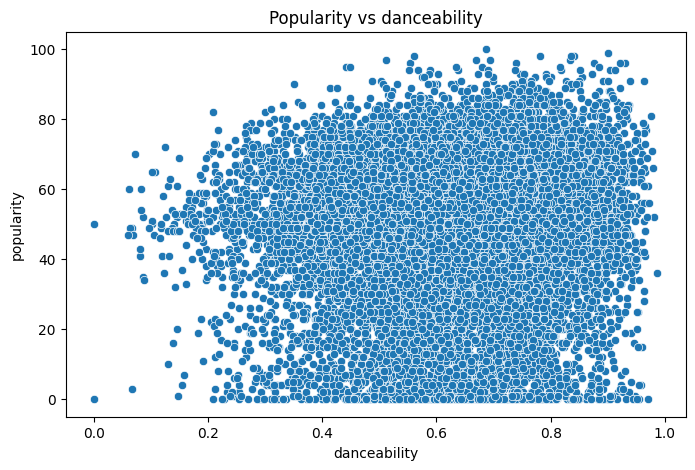

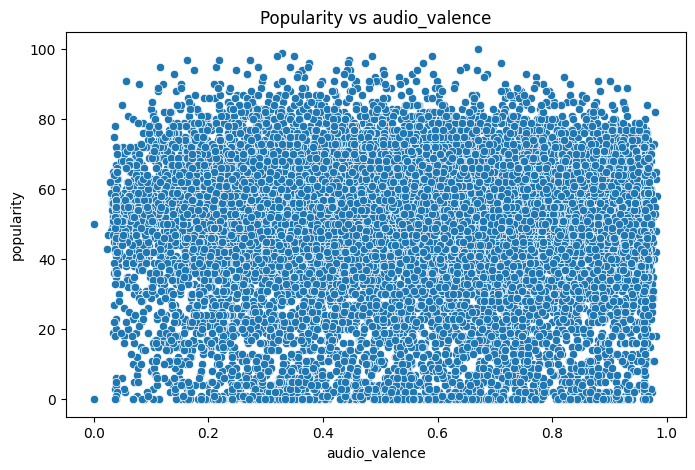

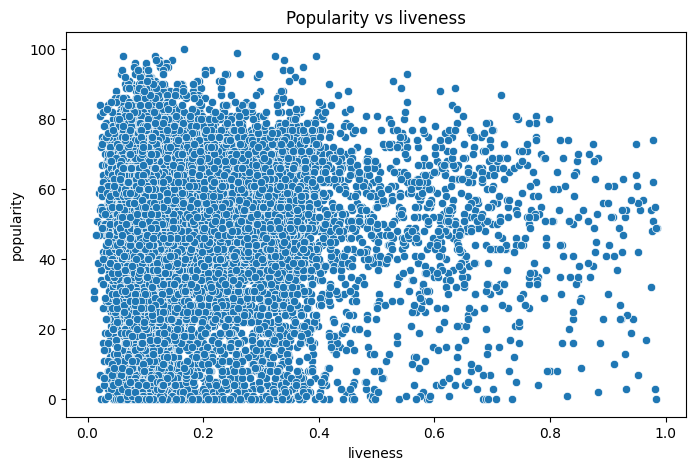

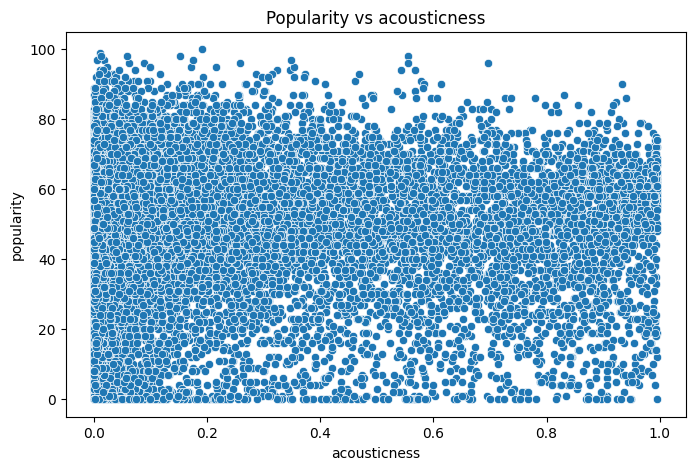

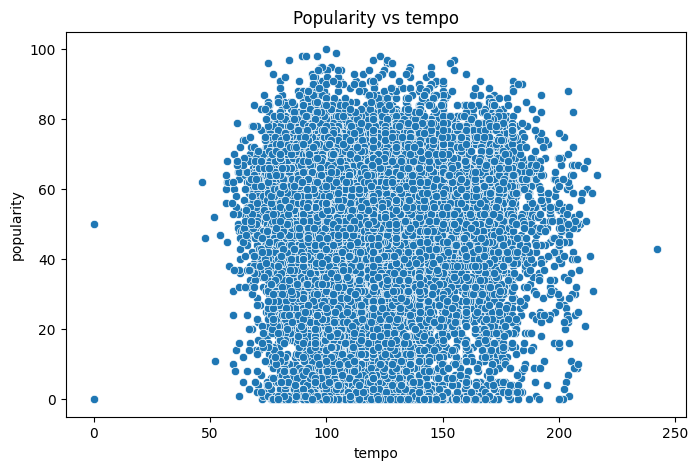

In [26]:
features = ['popularity','loudness','instrumentalness','danceability','audio_valence','liveness','acousticness','tempo']
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=newdata, x=feature, y='popularity')
    plt.title(f'Popularity vs {feature}')
    plt.show()

In [53]:
dividedata= pd.read_csv("cleaned_data.csv")

In [54]:
# Define a threshold for low popularity
threshold = 70  # Remove data with popularity ≤ 50

# Filter low-popularity items
low_popular_data = dividedata[dividedata['popularity'] <= threshold]

# Randomly remove 50% of low-popularity data
low_popular_data = low_popular_data.sample(frac=0.15, random_state=42)

# Keep high-popularity data
high_popular_data = dividedata[dividedata['popularity'] > threshold]

# Combine back the dataset
balanced_data = pd.concat([high_popular_data, low_popular_data])


In [55]:
balanced_data.to_csv('balanced.csv',index=False)

In [56]:
from sklearn.model_selection import train_test_split
df = pd.read_csv("balanced.csv")

# Convert target variable: Popularity > 60 → 1, otherwise 0
threshold = 70
df['popularity'] = (df['popularity'] > threshold).astype(int)
X = df.drop(columns=['popularity'])
y = df['popularity']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Check class distribution in percentage
class_distribution = y.value_counts(normalize=True) * 100
print("Class Distribution (%):")
print(class_distribution)

Class Distribution (%):
popularity
0    50.608966
1    49.391034
Name: proportion, dtype: float64


In [63]:
# Define a threshold for low popularity
threshold = 60  # Remove data with popularity ≤ 50

# Filter low-popularity items
low_popular_data = dividedata[dividedata['popularity'] <= threshold]

# Randomly remove 50% of low-popularity data
low_popular_data = low_popular_data.sample(frac=0.5, random_state=42)

# Keep high-popularity data
high_popular_data = dividedata[dividedata['popularity'] > threshold]

# Combine back the dataset
balanced_data = pd.concat([high_popular_data, low_popular_data])

In [64]:
balanced_data.to_csv('balanced60.csv',index=False)

In [65]:
from sklearn.model_selection import train_test_split
df = pd.read_csv("balanced60.csv")

# Convert target variable: Popularity > 60 → 1, otherwise 0
threshold = 60
df['popularity'] = (df['popularity'] > threshold).astype(int)
X = df.drop(columns=['popularity'])
y = df['popularity']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Check class distribution in percentage
class_distribution = y.value_counts(normalize=True) * 100
print("Class Distribution (%):")
print(class_distribution)

Class Distribution (%):
popularity
0    52.581536
1    47.418464
Name: proportion, dtype: float64
